---
title: "ACF and PACF graphs"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
    # suppress-bibliography: true
---

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
#| code-summary: "produce a time series"
phi1 = 1.5
phi2 = -0.75
N = 100
np.random.seed(0)  # For reproducibility
ar2_process = ArmaProcess(ar=[1, -phi1, -phi2], ma=[1])
ar2_values = ar2_process.generate_sample(nsample=N)


[Text(0.5, 0, 'time'), Text(0, 0.5, 'signal')]

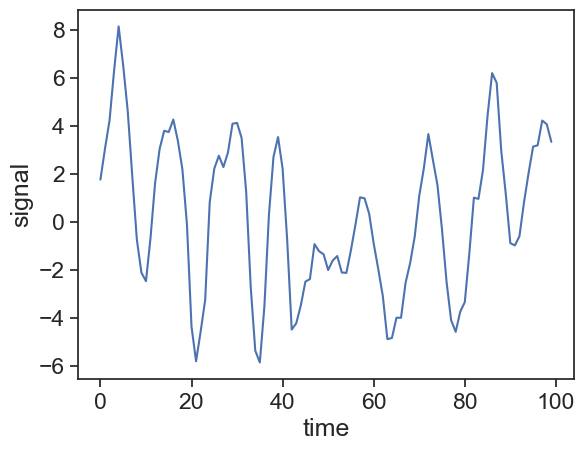

In [3]:
#| code-summary: "plot time series"
fig, ax = plt.subplots()
ax.plot(ar2_values)
ax.set(xlabel="time",
       ylabel="signal")

In [4]:
#| code-summary: "write a function to compute the acf"
def compute_acf(series):
    N = len(series)
    lags = np.arange(N)
    acf = np.zeros_like(lags)
    series = (series - series.mean()) / series.std()
    for i in lags:
        acf[i] = np.sum(series[i:] * series[:N-i])
    acf = acf / N
    return lags, acf

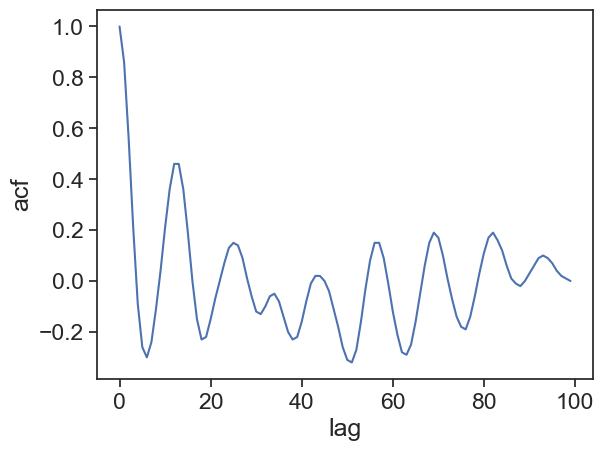

In [5]:
#| code-summary: "plot acf"
fig, ax = plt.subplots()
lags, acf = compute_acf(ar2_values)
ax.plot(lags, acf)
ax.set(xlabel="lag",
       ylabel="acf");

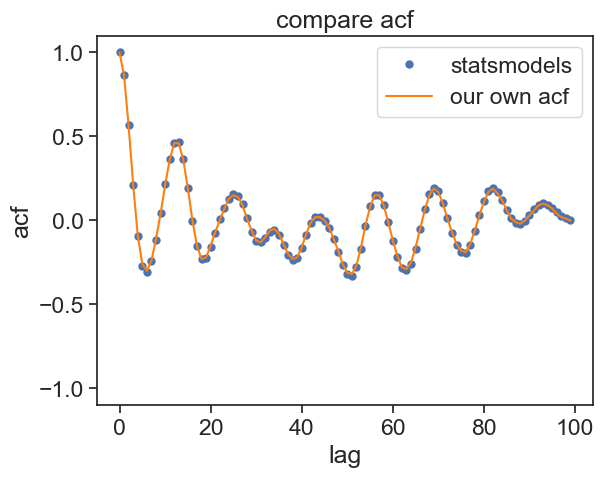

In [6]:
#| code-summary: "plot"
fig, ax = plt.subplots()
sm.graphics.tsa.plot_acf(ar2_values, lags= N-1, ax=ax, label="statsmodels", alpha=None, use_vlines=False)
ax.plot(lags, acf, color="tab:orange", label="our own acf")
ax.legend()
ax.set(ylim=[-1.1, 1.1],
       title="compare acf",
       xlabel="lag",
       ylabel="acf");

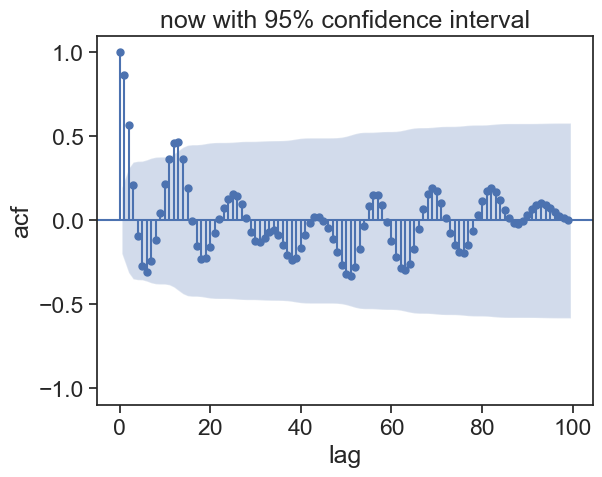

In [7]:
#| code-summary: "plot"
fig, ax = plt.subplots()
sm.graphics.tsa.plot_acf(ar2_values, lags= N-1, ax=ax, alpha=.05)
ax.set(ylim=[-1.1, 1.1],
       title="now confidence interval")
ax.set(ylim=[-1.1, 1.1],
       title="now with 95% confidence interval",
       xlabel="lag",
       ylabel="acf");

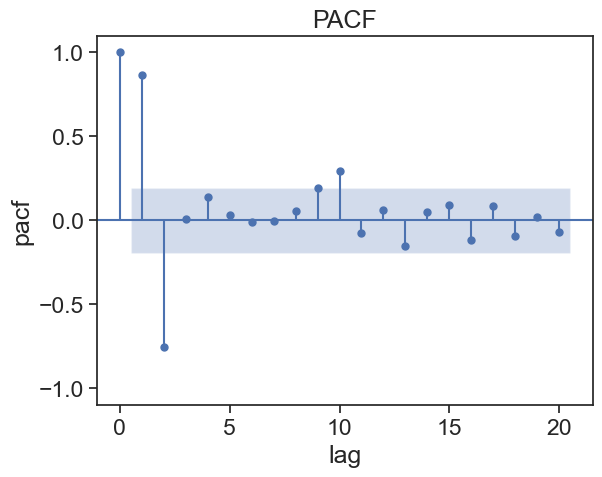

In [8]:
#| code-summary: "plot"
fig, ax = plt.subplots()
sm.graphics.tsa.plot_pacf(ar2_values, ax=ax, alpha=.05)
ax.set(ylim=[-1.1, 1.1],
       title="now confidence interval")
ax.set(ylim=[-1.1, 1.1],
       title="PACF",
       xlabel="lag",
       ylabel="pacf");